In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Create a common id for the teams in both databases

## Create helper table data:

In [39]:
team_name_pairings = [

    ('ac milan',
    'AC Milan'),

    ('arsenal',
    'Arsenal'),

    ('as monaco',
    'AS Monaco'),

    ('as roma',
    'AS Roma'),

    ('aston villa',
    'Aston Villa'),

    ('atletico madrid',
    'Atletico Madrid'),

    ('bologna fc',
    'Bologna FC'),

    ('everton fc',
    'Everton FC'),

    ('fc barcelona',
    'FC Barcelona'),

    ('fc porto',
    'FC Porto'),

    ('inter milan',
    'Inter Milan'),

    ('juventus',
    'Juventus'),

    ('lazio',
    'S.S. Lazio'),

    ('leeds united',
    'Leeds United'),

    ('manchester city',
    'Manchester City'),

    ('napoli',
    'Napoli'),

    ('paris saint germain',
    'Paris Saint-Germain'),

    ('real sociedad',
    'Real Sociedad'),

    ('sevilla fc',
    'Sevilla FC'),

    ('udinese',
    'Udinese Calcio'),

    ('valencia',
    'Valencia CF')
]

In [40]:
helper_table_data = [(t[0],t[1],i+1) for i,t in enumerate(team_name_pairings)]
helper_table_data

[('ac milan', 'AC Milan', 1),
 ('arsenal', 'Arsenal', 2),
 ('as monaco', 'AS Monaco', 3),
 ('as roma', 'AS Roma', 4),
 ('aston villa', 'Aston Villa', 5),
 ('atletico madrid', 'Atletico Madrid', 6),
 ('bologna fc', 'Bologna FC', 7),
 ('everton fc', 'Everton FC', 8),
 ('fc barcelona', 'FC Barcelona', 9),
 ('fc porto', 'FC Porto', 10),
 ('inter milan', 'Inter Milan', 11),
 ('juventus', 'Juventus', 12),
 ('lazio', 'S.S. Lazio', 13),
 ('leeds united', 'Leeds United', 14),
 ('manchester city', 'Manchester City', 15),
 ('napoli', 'Napoli', 16),
 ('paris saint germain', 'Paris Saint-Germain', 17),
 ('real sociedad', 'Real Sociedad', 18),
 ('sevilla fc', 'Sevilla FC', 19),
 ('udinese', 'Udinese Calcio', 20),
 ('valencia', 'Valencia CF', 21)]

In [41]:
from snowflake import connector

#setting credentials
import os
os.environ["SNOWSQL_USR"] = 'pp_guillermo' #insert username
os.environ["SNOWSQL_PWD"] = 'LionelMessi10' #insert password
os.environ["SNOWSQL_ACC"] = 'sx14805.west-europe.azure'
os.environ["SNOWSQL_WH"] = 'COMPUTE_WH'
os.environ["SNOWSQL_DB"] = 'PYTHON_PROJECT'
os.environ["SNOWSQL_SCH"] = 'PUBLIC'

# Connect to Snowflake
conn = connector.connect(
    user=os.getenv('SNOWSQL_USR'),
    password=os.getenv('SNOWSQL_PWD'),
    account=os.getenv('SNOWSQL_ACC'),
    warehouse=os.getenv('SNOWSQL_WH'),
    database=os.getenv('SNOWSQL_DB'),
    schema=os.getenv('SNOWSQL_SCH')
)

In [42]:
# Create a cursor object
cur = conn.cursor()

# Define all the setting queries
queries = [
        'USE ROLE PYTHON_PROJECT;',
        'USE DATABASE PYTHON_PROJECT;',
        'USE SCHEMA PYTHON_PROJECT.PUBLIC;',
        'USE WAREHOUSE COMPUTE_WH;'
        ]

# Adopt all correct settings
results=[]
for query in queries:
    cur.execute(query)
    result = cur.fetchall()
    results.append(result)

# Print the results
for row in results:
        print(row)

[('Statement executed successfully.',)]
[('Statement executed successfully.',)]
[('Statement executed successfully.',)]
[('Statement executed successfully.',)]


In [43]:
query = '''SELECT * FROM helper_table'''
cur.execute(query)
results = cur.fetchall()
results

[('ac milan', 'AC Milan', 1),
 ('arsenal', 'Arsenal', 2),
 ('as monaco', 'AS Monaco', 3),
 ('as roma', 'AS Roma', 4),
 ('aston villa', 'Aston Villa', 5),
 ('atletico madrid', 'Atletico Madrid', 6),
 ('bologna fc', 'Bologna FC', 7),
 ('everton fc', 'Everton FC', 8),
 ('fc barcelona', 'FC Barcelona', 9),
 ('fc porto', 'FC Porto', 10),
 ('inter milan', 'Inter Milan', 11),
 ('juventus', 'Juventus', 12),
 ('lazio', 'S.S. Lazio', 13),
 ('leeds united', 'Leeds United', 14),
 ('manchester city', 'Manchester City', 15),
 ('napoli', 'Napoli', 16),
 ('paris saint germain', 'Paris Saint-Germain', 17),
 ('real sociedad', 'Real Sociedad', 18),
 ('sevilla fc', 'Sevilla FC', 19),
 ('udinese', 'Udinese Calcio', 20),
 ('valencia', 'Valencia CF', 21)]

In [44]:
helper_df = pd.DataFrame(results, columns=['team_name_tokes', 'team_name_matches', 'common_id'])
helper_df

,team_name_tokes,team_name_matches,common_id
0,ac milan,AC Milan,1
1,arsenal,Arsenal,2
2,as monaco,AS Monaco,3
3,as roma,AS Roma,4
4,aston villa,Aston Villa,5
5,atletico madrid,Atletico Madrid,6
6,bologna fc,Bologna FC,7
7,everton fc,Everton FC,8
8,fc barcelona,FC Barcelona,9
9,fc porto,FC Porto,10


In [45]:
query = '''SELECT * FROM team_hist'''
cur.execute(query)
results = cur.fetchall()
results[:5]

[('AC Milan', datetime.datetime(2020, 6, 22, 17, 30), 98, 'W', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 6, 28, 15, 15), 98, 'W', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 7, 1, 19, 45), 98, 'D', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 7, 4, 19, 45), 98, 'W', 'MIL'),
 ('AC Milan', datetime.datetime(2020, 7, 7, 19, 45), 98, 'W', 'MIL')]

In [46]:
team_hist_df = pd.DataFrame(results, columns=['team_name', 'match_date', 'team_local_id', 'result', 'team_code'])
team_hist_df

,team_name,match_date,team_local_id,result,team_code
0,AC Milan,2020-06-22 17:30:00,98,W,MIL
1,AC Milan,2020-06-28 15:15:00,98,W,MIL
2,AC Milan,2020-07-01 19:45:00,98,D,MIL
3,AC Milan,2020-07-04 19:45:00,98,W,MIL
4,AC Milan,2020-07-07 19:45:00,98,W,MIL
...,...,...,...,...,...
3021,Valencia CF,2023-09-02 16:30:00,95,L,VAL
3022,Valencia CF,2023-09-16 14:15:00,95,W,VAL
3023,Valencia CF,2023-09-23 19:00:00,95,D,VAL
3024,Valencia CF,2023-09-27 19:30:00,95,L,VAL


In [47]:
query = '''SELECT * FROM fan_tokens'''
cur.execute(query)
results = cur.fetchall()
results[:5]

[(1,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 25),
  Decimal('311876.95'),
  Decimal('6.26')),
 (2,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 26),
  Decimal('311876.95'),
  Decimal('6.26')),
 (3,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 27),
  Decimal('300380.94'),
  Decimal('5.80')),
 (4,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 28),
  Decimal('318666.02'),
  Decimal('4.97')),
 (5,
  'fc barcelona',
  'fc barcelona fan token',
  'fc-barcelona-fan-token',
  datetime.date(2020, 6, 29),
  Decimal('331790.30'),
  Decimal('5.05'))]

In [48]:
fan_tokens_df = pd.DataFrame(results, columns=['id', 'team_name', 'token_name', 'slug', 'date', 'volume', 'price'])
fan_tokens_df

,id,team_name,token_name,slug,date,volume,price
0,1,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-25,311876.95,6.26
1,2,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-26,311876.95,6.26
2,3,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-27,300380.94,5.80
3,4,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-28,318666.02,4.97
4,5,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-29,331790.30,5.05
...,...,...,...,...,...,...,...
21796,34469,udinese,udinese fan token,udinese-fan-token,2023-10-01,60013.87,0.97
21797,34470,udinese,udinese fan token,udinese-fan-token,2023-10-02,56180.40,0.99
21798,34471,udinese,udinese fan token,udinese-fan-token,2023-10-03,52872.13,0.95
21799,34472,udinese,udinese fan token,udinese-fan-token,2023-10-04,49497.94,0.90


In [49]:
team_hist_df = team_hist_df.rename(columns={'team_name':'team_name_matches'}).merge(helper_df, on='team_name_matches')
team_hist_df

,team_name_matches,match_date,team_local_id,result,team_code,team_name_tokes,common_id
0,AC Milan,2020-06-22 17:30:00,98,W,MIL,ac milan,1
1,AC Milan,2020-06-28 15:15:00,98,W,MIL,ac milan,1
2,AC Milan,2020-07-01 19:45:00,98,D,MIL,ac milan,1
3,AC Milan,2020-07-04 19:45:00,98,W,MIL,ac milan,1
4,AC Milan,2020-07-07 19:45:00,98,W,MIL,ac milan,1
...,...,...,...,...,...,...,...
2738,Valencia CF,2023-09-02 16:30:00,95,L,VAL,valencia,21
2739,Valencia CF,2023-09-16 14:15:00,95,W,VAL,valencia,21
2740,Valencia CF,2023-09-23 19:00:00,95,D,VAL,valencia,21
2741,Valencia CF,2023-09-27 19:30:00,95,L,VAL,valencia,21


In [50]:
fan_tokens_df = fan_tokens_df.rename(columns={'team_name':'team_name_tokes'}).merge(helper_df)
fan_tokens_df

,id,team_name_tokes,token_name,slug,date,volume,price,team_name_matches,common_id
0,1,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-25,311876.95,6.26,FC Barcelona,9
1,2,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-26,311876.95,6.26,FC Barcelona,9
2,3,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-27,300380.94,5.80,FC Barcelona,9
3,4,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-28,318666.02,4.97,FC Barcelona,9
4,5,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-29,331790.30,5.05,FC Barcelona,9
...,...,...,...,...,...,...,...,...,...
16188,34469,udinese,udinese fan token,udinese-fan-token,2023-10-01,60013.87,0.97,Udinese Calcio,20
16189,34470,udinese,udinese fan token,udinese-fan-token,2023-10-02,56180.40,0.99,Udinese Calcio,20
16190,34471,udinese,udinese fan token,udinese-fan-token,2023-10-03,52872.13,0.95,Udinese Calcio,20
16191,34472,udinese,udinese fan token,udinese-fan-token,2023-10-04,49497.94,0.90,Udinese Calcio,20


In [51]:
team_hist_df['time'] = team_hist_df['match_date'].dt.time
team_hist_df['date'] = team_hist_df['match_date'].dt.date
team_hist_df

,team_name_matches,match_date,team_local_id,result,team_code,team_name_tokes,common_id,time,date
0,AC Milan,2020-06-22 17:30:00,98,W,MIL,ac milan,1,17:30:00,2020-06-22
1,AC Milan,2020-06-28 15:15:00,98,W,MIL,ac milan,1,15:15:00,2020-06-28
2,AC Milan,2020-07-01 19:45:00,98,D,MIL,ac milan,1,19:45:00,2020-07-01
3,AC Milan,2020-07-04 19:45:00,98,W,MIL,ac milan,1,19:45:00,2020-07-04
4,AC Milan,2020-07-07 19:45:00,98,W,MIL,ac milan,1,19:45:00,2020-07-07
...,...,...,...,...,...,...,...,...,...
2738,Valencia CF,2023-09-02 16:30:00,95,L,VAL,valencia,21,16:30:00,2023-09-02
2739,Valencia CF,2023-09-16 14:15:00,95,W,VAL,valencia,21,14:15:00,2023-09-16
2740,Valencia CF,2023-09-23 19:00:00,95,D,VAL,valencia,21,19:00:00,2023-09-23
2741,Valencia CF,2023-09-27 19:30:00,95,L,VAL,valencia,21,19:30:00,2023-09-27


In [52]:
fan_tokens_df['date']=pd.to_datetime(fan_tokens_df['date']).dt.date
fan_tokens_df

,id,team_name_tokes,token_name,slug,date,volume,price,team_name_matches,common_id
0,1,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-25,311876.95,6.26,FC Barcelona,9
1,2,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-26,311876.95,6.26,FC Barcelona,9
2,3,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-27,300380.94,5.80,FC Barcelona,9
3,4,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-28,318666.02,4.97,FC Barcelona,9
4,5,fc barcelona,fc barcelona fan token,fc-barcelona-fan-token,2020-06-29,331790.30,5.05,FC Barcelona,9
...,...,...,...,...,...,...,...,...,...
16188,34469,udinese,udinese fan token,udinese-fan-token,2023-10-01,60013.87,0.97,Udinese Calcio,20
16189,34470,udinese,udinese fan token,udinese-fan-token,2023-10-02,56180.40,0.99,Udinese Calcio,20
16190,34471,udinese,udinese fan token,udinese-fan-token,2023-10-03,52872.13,0.95,Udinese Calcio,20
16191,34472,udinese,udinese fan token,udinese-fan-token,2023-10-04,49497.94,0.90,Udinese Calcio,20


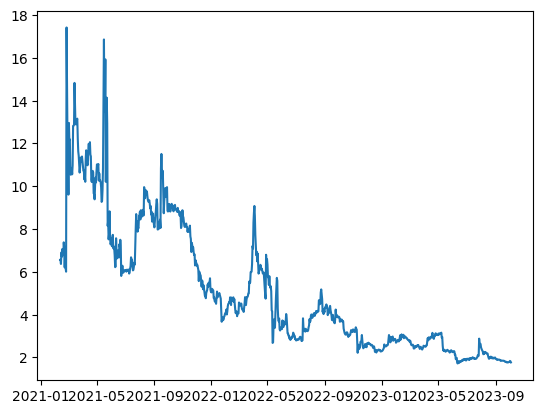

In [54]:
milan_fan_tokens = fan_tokens_df[fan_tokens_df['common_id'] == 1]

plt.plot(milan_fan_tokens['date'], milan_fan_tokens['price'])

plt.show()


In [55]:
milan_matches = team_hist_df[team_hist_df['common_id'] == 1]
milan_df = milan_matches.merge(milan_fan_tokens, on='date')
milan_df

,team_name_matches_x,match_date,team_local_id,result,team_code,team_name_tokes_x,common_id_x,time,date,id,team_name_tokes_y,token_name,slug,volume,price,team_name_matches_y,common_id_y
0,AC Milan,2021-02-13 19:45:00,98,L,MIL,ac milan,1,19:45:00,2021-02-13,8365,ac milan,ac milan fan token,ac-milan-fan-token,478681.31,6.37,AC Milan,1
1,AC Milan,2021-02-21 14:00:00,98,L,MIL,ac milan,1,14:00:00,2021-02-21,8373,ac milan,ac milan fan token,ac-milan-fan-token,324003.18,6.21,AC Milan,1
2,AC Milan,2021-02-28 19:45:00,98,W,MIL,ac milan,1,19:45:00,2021-02-28,8380,ac milan,ac milan fan token,ac-milan-fan-token,8723937.22,11.60,AC Milan,1
3,AC Milan,2021-03-03 19:45:00,98,D,MIL,ac milan,1,19:45:00,2021-03-03,8383,ac milan,ac milan fan token,ac-milan-fan-token,15556596.42,12.14,AC Milan,1
4,AC Milan,2021-03-07 14:00:00,98,W,MIL,ac milan,1,14:00:00,2021-03-07,8387,ac milan,ac milan fan token,ac-milan-fan-token,6767685.08,10.72,AC Milan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,AC Milan,2023-09-23 13:00:00,98,W,MIL,ac milan,1,13:00:00,2023-09-23,9317,ac milan,ac milan fan token,ac-milan-fan-token,463926.52,1.79,AC Milan,1
117,AC Milan,2023-09-27 16:30:00,98,W,MIL,ac milan,1,16:30:00,2023-09-27,9321,ac milan,ac milan fan token,ac-milan-fan-token,587740.10,1.77,AC Milan,1
118,AC Milan,2023-09-30 16:00:00,98,W,MIL,ac milan,1,16:00:00,2023-09-30,9324,ac milan,ac milan fan token,ac-milan-fan-token,564705.54,1.79,AC Milan,1
119,AC Milan,2023-10-04 19:00:00,98,D,MIL,ac milan,1,19:00:00,2023-10-04,9328,ac milan,ac milan fan token,ac-milan-fan-token,827107.20,1.77,AC Milan,1


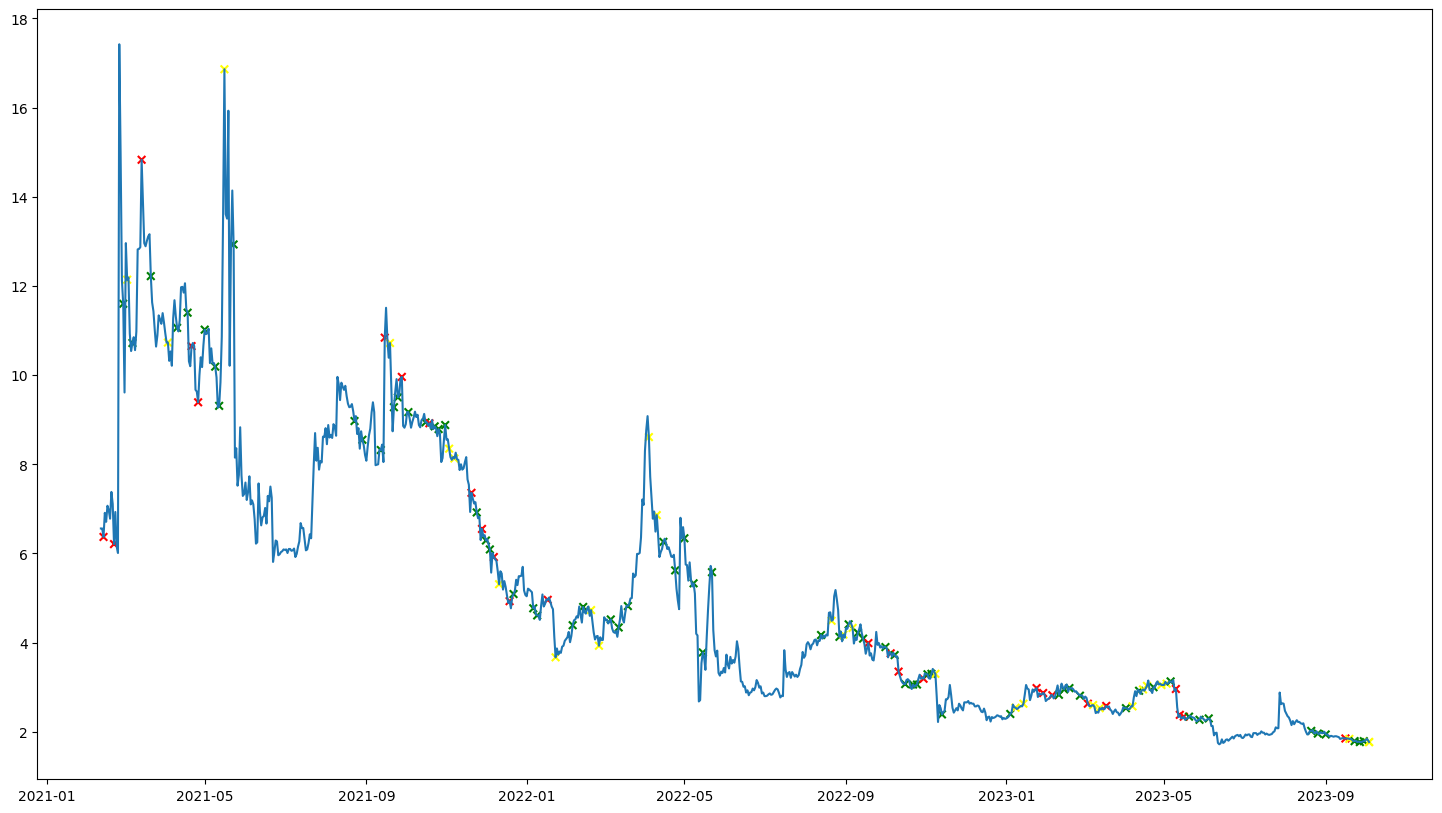

In [67]:
plt.figure(figsize=(18, 10))

color_mapping = {
    'W': 'green',
    'D': 'yellow',
    'L': 'red'
}

plt.plot(milan_fan_tokens['date'], milan_fan_tokens['price'])
plt.scatter(milan_df['date'], 
            milan_df['price'], 
            color=milan_df['result'].apply(lambda x: color_mapping[x]), 
            label=milan_df['result'],
            s=[30],
            marker='x')

# Add date 

plt.show()

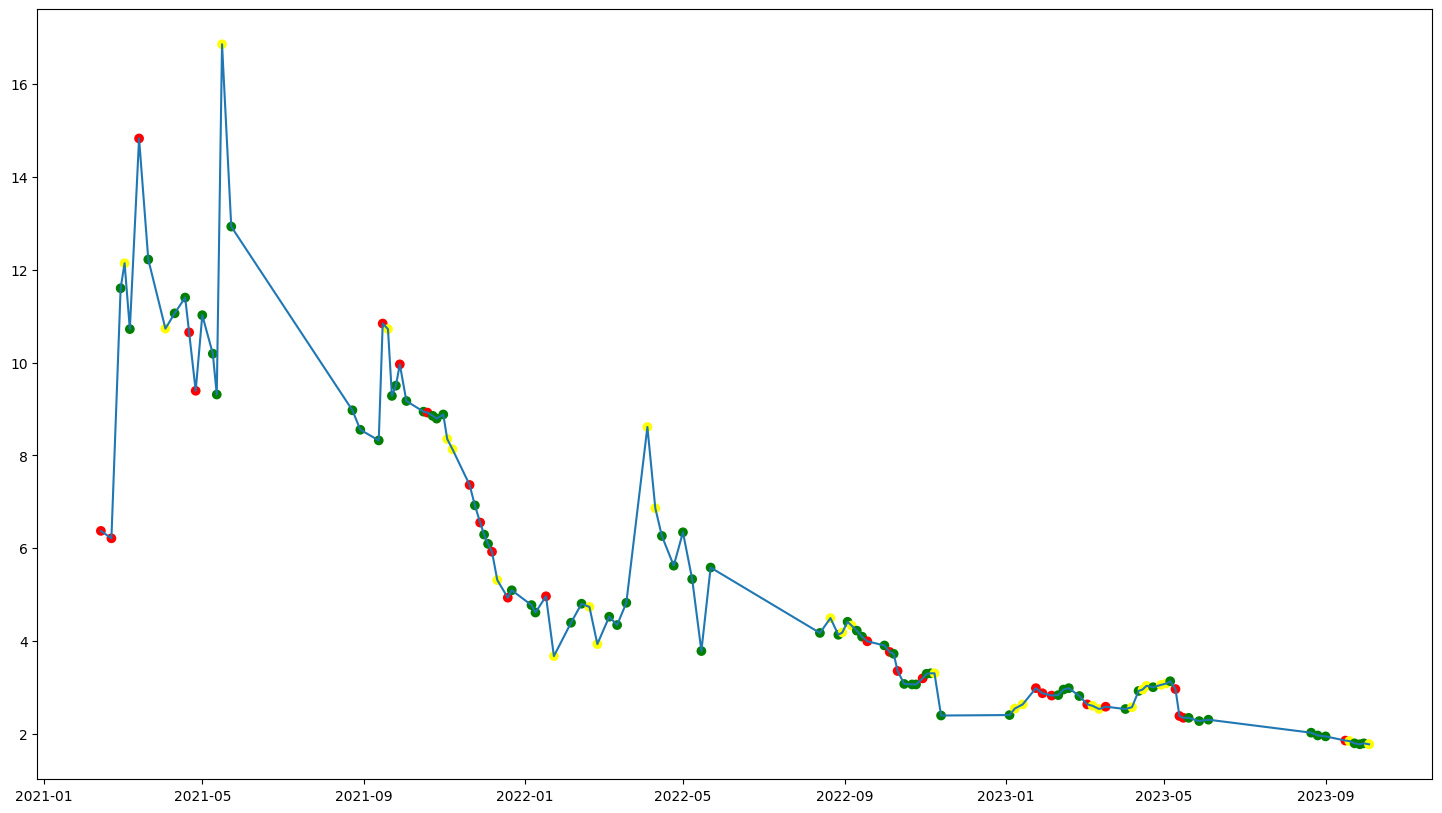

In [57]:
plt.figure(figsize=(18, 10))

color_mapping = {
    'W': 'green',
    'D': 'yellow',
    'L': 'red'
}

plt.plot(milan_df['date'], milan_df['price'])
plt.scatter(milan_df['date'], milan_df['price'], color=milan_df['result'].apply(lambda x: color_mapping[x]), label=milan_df['result'])

plt.show()

In [58]:
# Example of .diff()
data = {'Column1': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

df['Difference'] = df['Column1'].diff()

print(df)

   Column1  Difference
0       10         NaN
1       20        10.0
2       30        10.0
3       40        10.0
4       50        10.0


In [59]:
milan_df['price'].diff()

0        NaN
1      -0.16
2       5.39
3       0.54
4      -1.42
       ...  
116    -0.05
117    -0.02
118     0.02
119    -0.02
120     0.00
Name: price, Length: 121, dtype: object

In [60]:
milan_df

,team_name_matches_x,match_date,team_local_id,result,team_code,team_name_tokes_x,common_id_x,time,date,id,team_name_tokes_y,token_name,slug,volume,price,team_name_matches_y,common_id_y
0,AC Milan,2021-02-13 19:45:00,98,L,MIL,ac milan,1,19:45:00,2021-02-13,8365,ac milan,ac milan fan token,ac-milan-fan-token,478681.31,6.37,AC Milan,1
1,AC Milan,2021-02-21 14:00:00,98,L,MIL,ac milan,1,14:00:00,2021-02-21,8373,ac milan,ac milan fan token,ac-milan-fan-token,324003.18,6.21,AC Milan,1
2,AC Milan,2021-02-28 19:45:00,98,W,MIL,ac milan,1,19:45:00,2021-02-28,8380,ac milan,ac milan fan token,ac-milan-fan-token,8723937.22,11.60,AC Milan,1
3,AC Milan,2021-03-03 19:45:00,98,D,MIL,ac milan,1,19:45:00,2021-03-03,8383,ac milan,ac milan fan token,ac-milan-fan-token,15556596.42,12.14,AC Milan,1
4,AC Milan,2021-03-07 14:00:00,98,W,MIL,ac milan,1,14:00:00,2021-03-07,8387,ac milan,ac milan fan token,ac-milan-fan-token,6767685.08,10.72,AC Milan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,AC Milan,2023-09-23 13:00:00,98,W,MIL,ac milan,1,13:00:00,2023-09-23,9317,ac milan,ac milan fan token,ac-milan-fan-token,463926.52,1.79,AC Milan,1
117,AC Milan,2023-09-27 16:30:00,98,W,MIL,ac milan,1,16:30:00,2023-09-27,9321,ac milan,ac milan fan token,ac-milan-fan-token,587740.10,1.77,AC Milan,1
118,AC Milan,2023-09-30 16:00:00,98,W,MIL,ac milan,1,16:00:00,2023-09-30,9324,ac milan,ac milan fan token,ac-milan-fan-token,564705.54,1.79,AC Milan,1
119,AC Milan,2023-10-04 19:00:00,98,D,MIL,ac milan,1,19:00:00,2023-10-04,9328,ac milan,ac milan fan token,ac-milan-fan-token,827107.20,1.77,AC Milan,1


In [71]:
milan_df['price_delta'] = milan_df['price'].diff()
milan_df.groupby('result').agg({'price_delta':'median'})

,price_delta
result,
D,-0.005
L,-0.11
W,-0.06


In [75]:
price_delta_df = pd.DataFrame()

for id in team_hist_df['common_id'].unique():
    team_stats_df = team_hist_df[team_hist_df['common_id'] == id]
    team_tokens_df = fan_tokens_df[fan_tokens_df['common_id'] == id]
    team_df = team_stats_df.merge(team_tokens_df, on='date')
    team_name = team_df.loc[0, 'team_name_matches_x']
    team_df['price_delta'] = team_df['price'].diff()
    team_delta_df = team_df.groupby('result').agg({'price_delta':'median'}).rename(columns={'price_delta':f'{team_name}'})
    price_delta_df = pd.concat([price_delta_df, team_delta_df], axis=1)

price_delta_df = price_delta_df.transpose().reset_index().rename(columns={'index':'team_name'})

price_delta_df.columns.rename('index', inplace=True)

price_delta_df

index,team_name,D,L,W
0,AC Milan,-0.005,-0.11,-0.06
1,AS Roma,-0.12,-0.1,0.04
2,Arsenal,-0.01,-0.16,-0.04
3,Aston Villa,-0.05,-0.065,-0.03
4,Atletico Madrid,-0.03,-0.165,-0.12
5,Bologna FC,-0.01,-0.02,0.02
6,Everton FC,-0.03,-0.015,-0.035
7,FC Barcelona,-0.28,-0.12,-0.07
8,FC Porto,-0.01,-0.06,-0.02
9,Inter Milan,0.075,-0.01,-0.07


In [73]:
price_delta_df = pd.DataFrame()

for id in team_hist_df['common_id'].unique():
    team_stats_df = team_hist_df[team_hist_df['common_id'] == id]
    team_tokens_df = fan_tokens_df[fan_tokens_df['common_id'] == id]
    team_df = team_stats_df.merge(team_tokens_df, on='date')
    team_name = team_df.loc[0, 'team_name_matches_x']
    team_df['price_delta'] = team_df['price'].diff()
    team_delta_df = team_df.groupby('result').agg({'price_delta':'sum'}).rename(columns={'price_delta':f'{team_name}'})
    price_delta_df = pd.concat([price_delta_df, team_delta_df], axis=1)

price_delta_df = price_delta_df.transpose().reset_index().rename(columns={'index':'team_name'})

price_delta_df.columns.rename('index', inplace=True)

price_delta_df

index,team_name,D,L,W
0,AC Milan,5.62,2.26,-12.48
1,AS Roma,-9.81,1.01,6.72
2,Arsenal,-1.02,-1.81,-1.02
3,Aston Villa,-0.21,0.13,-2.59
4,Atletico Madrid,-1.99,-2.36,1.82
5,Bologna FC,-0.28,-0.50,0.34
6,Everton FC,-0.44,-0.49,-1.86
7,FC Barcelona,9.43,19.10,-32.14
8,FC Porto,-1.31,-4.03,1.50
9,Inter Milan,3.11,-1.89,-8.05


<BarContainer object of 3 artists>

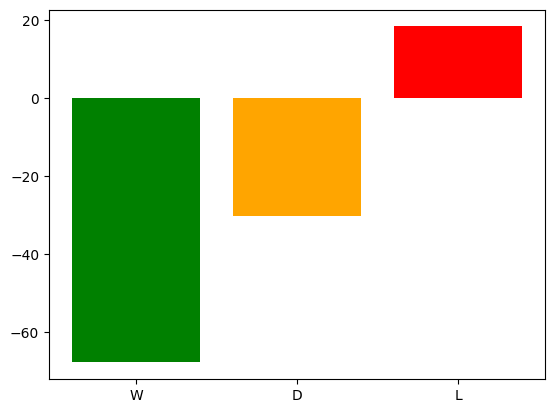

In [58]:
plt.bar(
    x=['W', 'D', 'L'],
    height=[
        price_delta_df.loc[:, 'W'].sum(),
        price_delta_df.loc[:, 'D'].sum(),
        price_delta_df.loc[:, 'L'].sum(),
    ],
    color=['green', 'orange', 'red']
)

In [120]:
team_matches = team_hist_df[team_hist_df['common_id'] == id]
team_matches.reset_index().loc[0, 'team_name_matches']

'Valencia CF'

In [124]:
team_hist_df['team_name_matches'].unique()

array(['AC Milan', 'AS Roma', 'Arsenal', 'Aston Villa', 'Atletico Madrid',
       'Bologna FC', 'Everton FC', 'FC Barcelona', 'FC Porto',
       'Inter Milan', 'Leeds United', 'Manchester City', 'Napoli',
       'Paris Saint-Germain', 'Real Sociedad', 'S.S. Lazio', 'Sevilla FC',
       'Udinese Calcio', 'Valencia CF'], dtype=object)

In [122]:
# Create team dataframe:
team_tokens = fan_tokens_df[fan_tokens_df['common_id'] == id]
team_matches = team_hist_df[team_hist_df['common_id'] == id]
team_name = team_matches.reset_index().loc[0, 'team_name_matches']
print(team_name)
team_df = team_matches.merge(team_tokens, on='date')

# Create a color mapping to differentiate wins, draws, and losses:
color_mapping = {
    'W': 'green',
    'D': 'yellow',
    'L': 'red'
}

result_mapping = {
    'W':'Win',
    'D':'Draw',
    'L':'Loss'
}

# Create a Plotly Express scatter plot for team prices:
fig = px.line(team_tokens, x='date', y='price', title=f"Matches and Price Visualization for {team_name}")
fig.update_traces(hoverinfo='skip', hovertemplate=None)

# Add scatter points for match results with pop-up text:
for index, row in team_df.iterrows():
    result_color = color_mapping.get(row['result'], 'black')
    result_name = result_mapping.get(row['result'], '')
    fig.add_trace(go.Scatter(
        x=[row['date']],
        y=[row['price']],
        mode='markers',
        name=row['result'],
        text=[f"Result: {result_name}<br>Date: {row['date']}<br>Price: {row['price']}"],
        hoverinfo='text',
        marker=dict(size=5, color=result_color, symbol='x')
    ))

# Customize the layout:
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Price")
fig.update_layout(showlegend=False)

Valencia CF


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'skip',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.date(2021, 9, 14), datetime.date(2021, 9, 15),
                          datetime.date(2021, 9, 16), ..., datetime.date(2023, 10, 3),
                          datetime.date(2023, 10, 4), datetime.date(2023, 10, 4)], dtype=object),
              'xaxis': 'x',
              'y': array([Decimal('2.75'), Decimal('2.75'), Decimal('2.87'), ..., Decimal('0.65'),
                          Decimal('0.63'), Decimal('0.63')], dtype=object),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'red', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'L',
              'text': [Result: Loss<br>Date: 2021-09-19<br>Price: 3.41],
              'type': 'scatter',
              'x': [2021-09-19],
              'y': [3.41]},
             {'hoverinfo': 'text',
              'marker': {'color': 'red', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'L',
              'text': [Result: Loss<br>Date: 2021-09-22<br>Price: 2.64],
              'type': 'scatter',
              'x': [2021-09-22],
              'y': [2.64]},
             {'hoverinfo': 'text',
              'marker': {'color': 'yellow', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'D',
              'text': [Result: Draw<br>Date: 2021-09-25<br>Price: 2.58],
              'type': 'scatter',
              'x': [2021-09-25],
              'y': [2.58]},
             {'hoverinfo': 'text',
              'marker': {'color': 'yellow', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'D',
              'text': [Result: Draw<br>Date: 2021-10-02<br>Price: 2.52],
              'type': 'scatter',
              'x': [2021-10-02],
              'y': [2.52]},
             {'hoverinfo': 'text',
              'marker': {'color': 'red', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'L',
              'text': [Result: Loss<br>Date: 2021-10-17<br>Price: 2.67],
              'type': 'scatter',
              'x': [2021-10-17],
              'y': [2.67]},
             {'hoverinfo': 'text',
              'marker': {'color': 'yellow', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'D',
              'text': [Result: Draw<br>Date: 2021-10-23<br>Price: 2.49],
              'type': 'scatter',
              'x': [2021-10-23],
              'y': [2.49]},
             {'hoverinfo': 'text',
              'marker': {'color': 'red', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'L',
              'text': [Result: Loss<br>Date: 2021-10-27<br>Price: 2.64],
              'type': 'scatter',
              'x': [2021-10-27],
              'y': [2.64]},
             {'hoverinfo': 'text',
              'marker': {'color': 'green', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'W',
              'text': [Result: Win<br>Date: 2021-10-30<br>Price: 2.29],
              'type': 'scatter',
              'x': [2021-10-30],
              'y': [2.29]},
             {'hoverinfo': 'text',
              'marker': {'color': 'yellow', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'D',
              'text': [Result: Draw<br>Date: 2021-11-07<br>Price: 2.22],
              'type': 'scatter',
              'x': [2021-11-07],
              'y': [2.22]},
             {'hoverinfo': 'text',
              'marker': {'color': 'yellow', 'size': 5, 'symbol': 'x'},
              'mode': 'markers',
              'name': 'D',
         

In [130]:
id = team_hist_df[team_hist_df['team_name_matches'] == 'AC Milan'].loc[0, 'common_id']

1

In [133]:
team_name = 'AS Roma'

team_matches = team_hist_df[team_hist_df['team_name_matches'] == team_name]
id = team_matches.reset_index().loc[0, 'common_id']
team_tokens = fan_tokens_df[fan_tokens_df['common_id'] == id]

print(id)

4


In [136]:
team_matches

,team_name_matches,match_date,team_local_id,result,team_code,team_name_tokes,common_id,time,date
153,AS Roma,2020-06-24 19:45:00,100,W,ROM,as roma,4,19:45:00,2020-06-24
154,AS Roma,2020-06-28 15:15:00,100,L,ROM,as roma,4,15:15:00,2020-06-28
155,AS Roma,2020-07-02 19:45:00,100,L,ROM,as roma,4,19:45:00,2020-07-02
156,AS Roma,2020-07-05 19:45:00,100,L,ROM,as roma,4,19:45:00,2020-07-05
157,AS Roma,2020-07-08 19:45:00,100,W,ROM,as roma,4,19:45:00,2020-07-08
...,...,...,...,...,...,...,...,...,...
280,AS Roma,2023-09-01 18:45:00,100,L,ROM,as roma,4,18:45:00,2023-09-01
281,AS Roma,2023-09-17 18:45:00,100,W,ROM,as roma,4,18:45:00,2023-09-17
282,AS Roma,2023-09-24 18:45:00,100,D,ROM,as roma,4,18:45:00,2023-09-24
283,AS Roma,2023-09-28 18:45:00,100,L,ROM,as roma,4,18:45:00,2023-09-28


In [138]:
import datetime

In [159]:
team_hist_df['match_date'].min()

Timestamp('2020-06-03 20:15:00')

In [158]:
fan_tokens_df['date'].min()

datetime.date(2020, 4, 17)

In [151]:
team_hist_df['date'].max()

datetime.date(2023, 10, 4)

In [174]:
min_date = team_matches['match_date'].min()
min_date

Timestamp('2020-06-24 19:45:00')

In [179]:
start_date='2020-06-25'
end_date='2023-10-01'
team_df[(pd.to_datetime(start_date) < team_df['match_date']) & (team_df['match_date'] < pd.to_datetime(end_date))]

,team_name_matches_x,match_date,team_local_id,result,team_code,team_name_tokes_x,common_id_x,time,date,id,team_name_tokes_y,token_name,slug,volume,price,team_name_matches_y,common_id_y
0,Valencia CF,2021-09-19 19:00:00,95,L,VAL,valencia,21,19:00:00,2021-09-19,13718,valencia,valencia fan token,valencia-fan-token,225249.89,3.41,Valencia CF,21
1,Valencia CF,2021-09-22 17:30:00,95,L,VAL,valencia,21,17:30:00,2021-09-22,13721,valencia,valencia fan token,valencia-fan-token,165728.20,2.64,Valencia CF,21
2,Valencia CF,2021-09-25 14:15:00,95,D,VAL,valencia,21,14:15:00,2021-09-25,13724,valencia,valencia fan token,valencia-fan-token,194140.99,2.58,Valencia CF,21
3,Valencia CF,2021-10-02 16:30:00,95,D,VAL,valencia,21,16:30:00,2021-10-02,13731,valencia,valencia fan token,valencia-fan-token,148746.38,2.52,Valencia CF,21
4,Valencia CF,2021-10-17 19:00:00,95,L,VAL,valencia,21,19:00:00,2021-10-17,13746,valencia,valencia fan token,valencia-fan-token,262022.70,2.67,Valencia CF,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Valencia CF,2023-08-27 17:30:00,95,L,VAL,valencia,21,17:30:00,2023-08-27,14425,valencia,valencia fan token,valencia-fan-token,202539.71,0.77,Valencia CF,21
75,Valencia CF,2023-09-02 16:30:00,95,L,VAL,valencia,21,16:30:00,2023-09-02,14431,valencia,valencia fan token,valencia-fan-token,188591.50,0.72,Valencia CF,21
76,Valencia CF,2023-09-16 14:15:00,95,W,VAL,valencia,21,14:15:00,2023-09-16,14445,valencia,valencia fan token,valencia-fan-token,92097.12,0.65,Valencia CF,21
77,Valencia CF,2023-09-23 19:00:00,95,D,VAL,valencia,21,19:00:00,2023-09-23,14452,valencia,valencia fan token,valencia-fan-token,98861.59,0.65,Valencia CF,21


In [186]:
team_tokens = fan_tokens_df[fan_tokens_df['common_id'] == 1]
team_tokens['date'] = pd.to_datetime(team_tokens['date'])
team_tokens[(pd.to_datetime(start_date) < team_tokens['date']) & (team_tokens['date'] < pd.to_datetime(end_date))]

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_21532\3567983338.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,team_name_tokes,token_name,slug,date,volume,price,team_name_matches,common_id
7144,8363,ac milan,ac milan fan token,ac-milan-fan-token,2021-02-11,1554903.34,6.56,AC Milan,1
7145,8364,ac milan,ac milan fan token,ac-milan-fan-token,2021-02-12,1554903.34,6.56,AC Milan,1
7146,8365,ac milan,ac milan fan token,ac-milan-fan-token,2021-02-13,478681.31,6.37,AC Milan,1
7147,8366,ac milan,ac milan fan token,ac-milan-fan-token,2021-02-14,495986.46,6.91,AC Milan,1
7148,8367,ac milan,ac milan fan token,ac-milan-fan-token,2021-02-15,410983.59,6.71,AC Milan,1
...,...,...,...,...,...,...,...,...,...
8101,9320,ac milan,ac milan fan token,ac-milan-fan-token,2023-09-26,701075.54,1.78,AC Milan,1
8102,9321,ac milan,ac milan fan token,ac-milan-fan-token,2023-09-27,587740.10,1.77,AC Milan,1
8103,9322,ac milan,ac milan fan token,ac-milan-fan-token,2023-09-28,608496.49,1.77,AC Milan,1
8104,9323,ac milan,ac milan fan token,ac-milan-fan-token,2023-09-29,702730.69,1.78,AC Milan,1


In [175]:
team_matches[(min_date < team_matches['match_date']) & (team_matches['match_date'] > pd.to_datetime('2020-06-25'))]

,team_name_matches,match_date,team_local_id,result,team_code,team_name_tokes,common_id,time,date
154,AS Roma,2020-06-28 15:15:00,100,L,ROM,as roma,4,15:15:00,2020-06-28
155,AS Roma,2020-07-02 19:45:00,100,L,ROM,as roma,4,19:45:00,2020-07-02
156,AS Roma,2020-07-05 19:45:00,100,L,ROM,as roma,4,19:45:00,2020-07-05
157,AS Roma,2020-07-08 19:45:00,100,W,ROM,as roma,4,19:45:00,2020-07-08
158,AS Roma,2020-07-11 17:30:00,100,W,ROM,as roma,4,17:30:00,2020-07-11
...,...,...,...,...,...,...,...,...,...
280,AS Roma,2023-09-01 18:45:00,100,L,ROM,as roma,4,18:45:00,2023-09-01
281,AS Roma,2023-09-17 18:45:00,100,W,ROM,as roma,4,18:45:00,2023-09-17
282,AS Roma,2023-09-24 18:45:00,100,D,ROM,as roma,4,18:45:00,2023-09-24
283,AS Roma,2023-09-28 18:45:00,100,L,ROM,as roma,4,18:45:00,2023-09-28
